# Machine Learning

## Daniel Dimitrov


In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import statsmodels.api as sm
import scipy.interpolate as si
import seaborn as sb


## Problem 1 : Logistic Regression and CV

In [39]:
strongdrink = pd.read_csv('data/strongdrink.txt')
strongdrink.sample(5)

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
165,3,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
109,2,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
51,1,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
152,3,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
105,2,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315


### Explore the data first : 

In [40]:
strongdrink.describe()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.926136,13.006534,2.327159,2.367386,19.492045,99.840909,2.298920,2.043352,0.359545,1.597727,5.031761,0.961000,2.623409,748.477273
std,0.771047,0.814431,1.117747,0.275617,3.355821,14.329499,0.627333,0.995579,0.123046,0.571958,2.317965,0.227225,0.705369,316.208737
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.597500,2.210000,17.175000,88.000000,1.747500,1.242500,0.267500,1.250000,3.200000,0.790000,1.990000,500.000000
50%,2.000000,13.050000,1.845000,2.360000,19.500000,98.000000,2.380000,2.155000,0.340000,1.560000,4.640000,0.975000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.250000,2.800000,2.882500,0.430000,1.952500,6.147500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


2    71
1    59
3    46
Name: cultivar, dtype: int64


cultivar      0
alco          0
malic         0
ash           0
alk           0
magn          0
tot_phen      0
flav          0
nonfl_phen    0
proanth       0
color_int     0
hue           0
OD280rat      0
proline       0
dtype: int64

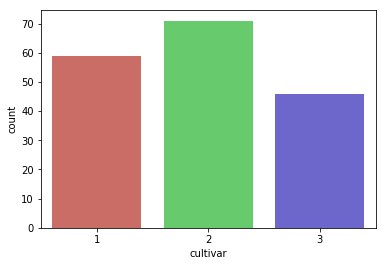

In [41]:
print(strongdrink['cultivar'].value_counts())
sb.countplot(x='cultivar', data=strongdrink, palette='hls')
#check for missing values
strongdrink.isnull().sum()

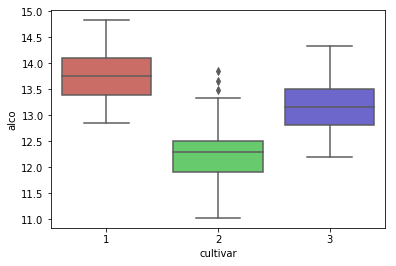

In [42]:
sb.boxplot(x='cultivar', y='alco', data=strongdrink, palette='hls')

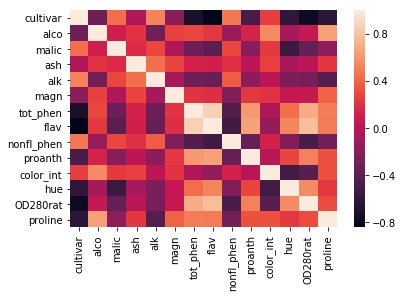

In [43]:
sb.heatmap(strongdrink.corr())

### Problem 1/ Part a.

In [53]:
# Estimate the model on a 75% sample training set
y = strongdrink['cultivar']
X = strongdrink[['alco', 'malic', 'tot_phen', 'color_int']]
          
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

# Fit the logistic regression
LogReg = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X_train, y_train)
print(classification_report(y_test, y_pred))
index = pd.DataFrame(['beta0', 'beta1', 'beta2', 'beta3', 'beta4'])

# Report your two sets of estimated coeff/s and intercepts
j1 = pd.DataFrame([LogReg.intercept_[0]] + list(LogReg.coef_[0]))
j2 = pd.DataFrame([LogReg.intercept_[1]] + list(LogReg.coef_[1]))
result = pd.concat([index, j1, j2], axis=1)
result.columns = ['coefficient','j = 1','j = 2']
result

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



,coefficient,j = 1,j = 2
0,beta0,-24.010989,22.802446
1,beta1,1.700403,-1.468044
2,beta2,-0.265605,-0.333053
3,beta3,1.223894,0.664012
4,beta4,0.022756,-0.922712


In [54]:
y_pred=LogReg.predict(X_test)
target_names = ['j=1', 'j=2', 'j=3']
# MSEs are in the precision column
# Number of obs.s is the suport column
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         j=1       0.87      1.00      0.93        13
         j=2       1.00      0.90      0.95        21
         j=3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



### Problem 1/ Part b.

In [57]:
# Perform a leave-one-out cross validation

Xvars = X.values
yvars = y.values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
y_pred = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X_train, y_train)
    y_pred[test_index] = LogReg.predict(X_test)
    
    MSE_vec[test_index] = y_test != y_pred[test_index]

# Get the MSE
MSE_loo = MSE_vec.mean()
print('test estimate MSE loocv=', MSE_loo)

test estimate MSE loocv= 0.07954545454545454


In [58]:
print(classification_report(yvars, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.93      0.92        59
           2       0.91      0.90      0.91        71
           3       0.96      0.93      0.95        46

   micro avg       0.92      0.92      0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



### Problem 1/ Part c.

In [65]:
# k-fold cross validation

Xvars = X.values
yvars = y.values
k = 4
kf = KFold(n_splits=4, shuffle=True, random_state=10)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)
y_pred = np.zeros(len(yvars))

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X_train, y_train)
    
    y_pred[test_index] = LogReg.predict(X_test)

    err = y_pred[test_index] != y_test
    MSE_vec_kf[k_ind] = err.mean()
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
print('test estimate MSE k-fold (k=4) =', MSE_kf)


test estimate MSE k-fold (k=4) = 0.09090909090909091


In [66]:
print(classification_report(yvars, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        59
           2       0.91      0.87      0.89        71
           3       0.96      0.93      0.95        46

   micro avg       0.91      0.91      0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



## Problem 2: Decision Trees

In [83]:
import graphviz
import numpy as np
import pandas as pd
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

In [147]:
bidenData = pd.read_csv('data/biden.csv')
bidenData = bidenData.dropna()
bidenData.sample(5)

,biden,female,age,educ,dem,rep
55,50,1,35,12,0,0
193,40,1,40,16,1,0
1162,50,1,53,14,0,1
596,75,1,81,12,0,1
784,75,0,55,12,1,0


### Explore the data

In [148]:
bidenData.describe()

,biden,female,age,educ,dem,rep
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,62.163807,0.552850,47.535141,13.360266,0.431655,0.205313
std,23.462034,0.497337,16.887444,2.440257,0.495444,0.404042
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,34.000000,12.000000,0.000000,0.000000
50%,60.000000,1.000000,47.000000,13.000000,0.000000,0.000000
75%,85.000000,1.000000,59.500000,16.000000,1.000000,0.000000
max,100.000000,1.000000,93.000000,17.000000,1.000000,1.000000


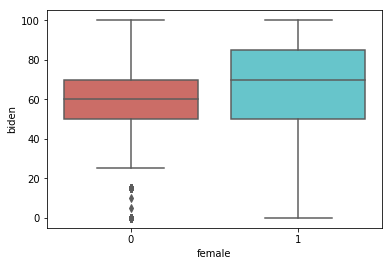

In [149]:
sb.boxplot(x='female', y='biden', data=biden, palette='hls')

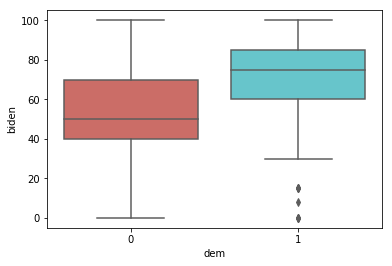

In [150]:
sb.boxplot(x='dem', y='biden', data=biden, palette='hls')

### Problem 2/ Part a.

In [151]:
xvars = ['female', 'age', 'educ', 'dem', 'rep']
X = bidenData[xvars]
y = bidenData['biden']

# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=25)

In [152]:
import os
os.environ['PATH'] += os.pathsep + r'C:\Git\graphviz-2.38\bin'

# Use recursive binary splitting to fit a decision tree to the training data
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

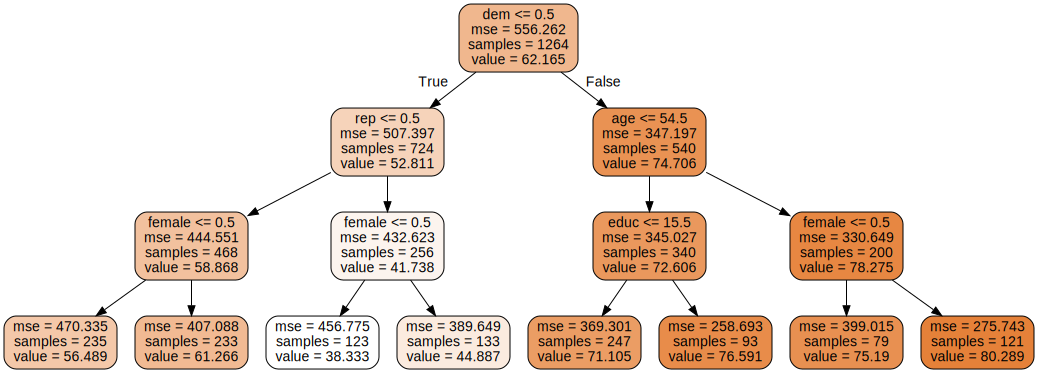

In [153]:
biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    feature_names=bidenData.columns[1:],
    class_names=bidenData.columns[0],
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

In [100]:
y_pred = biden_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 396.1937146321307


### Problem 2/ Part b.

In [101]:
# tune the hyperparameters in the decision tree
param_dist1 = {'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

biden_tree2 = DecisionTreeRegressor()

random_search1 = RandomizedSearchCV(biden_tree2, 
                                    param_distributions=param_dist1,
                                    n_iter=100, 
                                    n_jobs=-1, 
                                    cv=5, 
                                    random_state=25,
                                    scoring='neg_mean_squared_error')

random_search1.fit(X, y)
print('Best estimator = ', random_search1.best_estimator_)
print('Best tuning parameters = ', random_search1.best_params_)
print('MSE of optimal results =', -random_search1.best_score_)

Best estimator =  DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=14, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Best tuning parameters =  {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
MSE of optimal results = 401.6903602232667


### Problem 2/ Part c.

In [104]:
# tune the parameters of a RandomForest regression model
param_dist2 = { 'n_estimators': [10, 200],
                'max_depth': [3, 10],
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 5)}

biden_tree3 = RandomForestRegressor(bootstrap=True,oob_score=True, random_state=25)

random_search2 = RandomizedSearchCV(biden_tree3, param_distributions=param_dist2, n_iter=100,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

random_search2.fit(X, y)
print('Best estimator = ', random_search2.best_estimator_)
print('Best tuning parameters = ', random_search2.best_params_)
print('MSE of optimal results =', -random_search2.best_score_)

Best estimator =  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=13, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=True, random_state=25,
           verbose=0, warm_start=False)
Best tuning parameters =  {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
MSE of optimal results = 397.0681090117028


C:\Users\danie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


## Problem 3 : Classiffier

In [108]:
autoData = pd.read_csv('data/Auto.csv', na_values=['?'])
autoData = autoData.dropna()

In [109]:
med = autoData['mpg'].median()
autoData['mpg_high'] = (autoData['mpg'] >= med).astype(int)
autoData['const'] = 1
autoData['origin1'] = (autoData['origin'] == 1).astype(int)
autoData['origin2'] = (autoData['origin'] == 2).astype(int)

In [112]:
autoData.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high,const,origin1,origin2
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.0,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.500000,1.0,0.625000,0.173469
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.500639,0.0,0.484742,0.379136
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,1.0,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000,1.0,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.500000,1.0,1.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000,1.0,1.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.0,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0B47F13C8>,
      dtype=object)

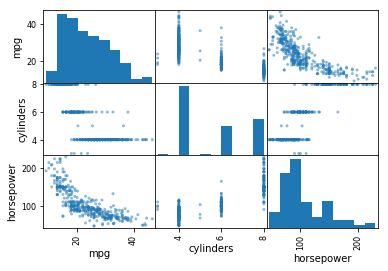

In [120]:
pd.plotting.scatter_matrix(autoData[["mpg", "cylinders", "horsepower"]])


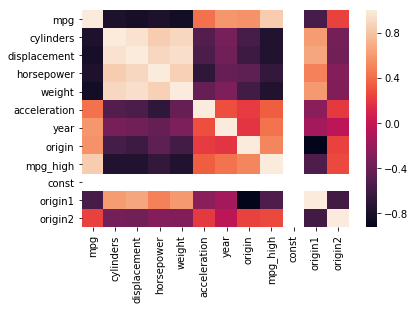

In [121]:
sb.heatmap(autoData.corr())

### Problem 3 / Part a. 

In [110]:
xvars = ['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin1', 'origin2']
X = autoData[xvars]
y = autoData['mpg_high']
Xvals = X.values
yvals = y.values

In [115]:
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=25)
kf.get_n_splits(Xvals)
MSE_vec = np.zeros(k)
grp0_err_vec = np.zeros(k)
grp1_err_vec = np.zeros(k)

k = 0
for train_index, test_index in kf.split(Xvals):
    print('k =', k)
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    
    LogReg = LogisticRegression(solver='liblinear')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    MSE_vec[k] = ((y_test - y_pred) ** 2).mean()
    grp0_err_vec[k] = sum((y_test != y_pred) * (y_test == 0)) / sum(y_test == 0)
    grp1_err_vec[k] = sum((y_test != y_pred) * (y_test == 1)) / sum(y_test == 1)
    
    k += 1

print('Average MSE across k = 4=', round(MSE_vec.mean(), 3))
print('Average error rate for mpg_high == 0 :', round(grp0_err_vec.mean()*100, 3), '%')
print('Average error rate for mpg_high == 1 :', round(grp1_err_vec.mean()*100, 3), '%')

k = 0
k = 1
k = 2
k = 3
Average MSE across k = 4= 0.097
Average error rate for mpg_high == 0 : 11.365 %
Average error rate for mpg_high == 1 : 7.941 %


In [116]:
### Problem 3 / Part b. 

In [117]:
# fit a random forest model

xvars = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin1', 'origin2']
X = data[xvars]
y = data['mpg_high']

param_dist3 = { 'n_estimators': [10, 200],
                'max_depth': [3, 8],
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 8)}

mpg_tree = RandomForestClassifier(bootstrap=True, oob_score=True, random_state=25)

random_search3 = RandomizedSearchCV(mpg_tree, param_distributions=param_dist3, n_iter=100,
                                    n_jobs=-1, cv=4, random_state=25, scoring='neg_mean_squared_error')

random_search3.fit(X, y)
print('Best estimator = ', random_search3.best_estimator_)
print('Best tuning parameters = ', random_search3.best_params_)
print('MSE of optimal results =', -random_search3.best_score_)

Best estimator =  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=25, verbose=0, warm_start=False)
Best tuning parameters =  {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}
MSE of optimal results = 0.08928571428571429


C:\Users\danie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


# Problem 4 : Neural Nets

In [124]:
dataStrongdrink = pd.read_csv('data/strongdrink.txt')
dataStrongdrink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Problem 4 / Part a

Text(0.5, 1.0, 'Color vs. Alcohol')

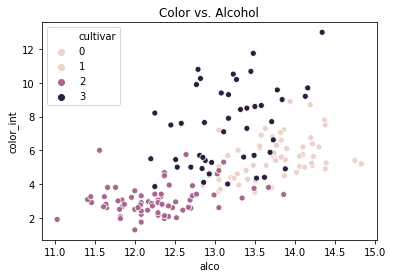

In [131]:
# Make the dot of each of the three possible cultivar types a different color.
sb.scatterplot(x="alco", y="color_int",
              hue="cultivar",
              data=dataStrongdrink);
plt.title("Color vs. Alcohol")

### Problem 4 / Part b

In [135]:
Xvars = ['alco', 'malic', 'tot_phen', 'color_int']
X = dataStrongdrink[Xvars]
y = dataStrongdrink['cultivar']

# Fit a multinomial logistic model
LogReg = LogisticRegression()

# optimally tune the hyperparameters
param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogReg, param_distributions=param_dist1, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search1.fit(X, y)

print('Best tuning parameters = ', random_search1.best_params_)
print('MSE of optimal results =', -random_search1.best_score_)

Best tuning parameters =  {'C': 2.406759481848201, 'penalty': 'l1'}
MSE of optimal results = 0.11363636363636363


C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Problem 4 / Part c

In [ ]:
forest = RandomForestClassifier(bootstrap=True, oob_score=True)

param_dist2 = { 'n_estimators': sp_randint(10, 200),
                'max_depth': sp_randint(2, 4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}

random_search2 = RandomizedSearchCV(forest, param_distributions=param_dist2, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search2.fit(X, y)
print('Best tuning parameters = ', random_search2.best_params_)
print('MSE of optimal results =', -random_search2.best_score_)

### Problem 4 / Part d

In [137]:
svc_model = SVC(kernel='rbf')

param_dist3 = { 'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}
random_search3 = RandomizedSearchCV(svc_model, param_distributions=param_dist3, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search3.fit(X, y)
print('Best tuning parameters = ', random_search3.best_params_)
print('MSE of optimal results =', -random_search3.best_score_)

Best tuning parameters =  {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
MSE of optimal results = 0.14772727272727273


C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Problem 4 / Part e

In [142]:
nn = MLPClassifier(solver='lbfgs')

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
                'activation': ['logistic', 'relu'],
                'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(nn, param_distributions=param_dist4, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search4.fit(X, y)
print('Best tuning parameters = ', random_search4.best_params_)
print('MSE of optimal results =', -random_search4.best_score_)

Best tuning parameters =  {'activation': 'relu', 'alpha': 0.23318052236376277, 'hidden_layer_sizes': 18}
MSE of optimal results = 0.0625


C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


+ Neural networks is the best - it has to lowest MSE